In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

<Axes: xlabel='X', ylabel='y'>

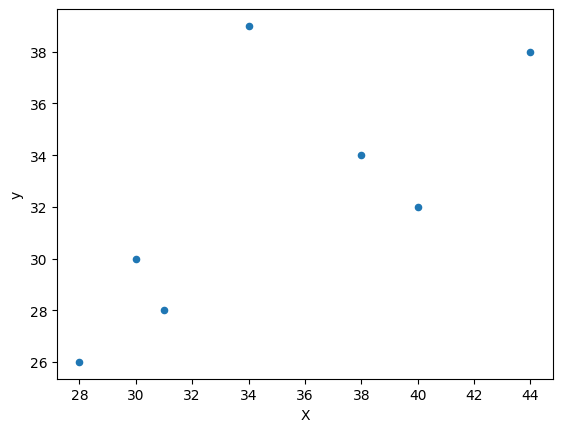

In [208]:
data = { 'X': [40, 34, 28, 30, 44, 38, 31], 'y': [32, 39, 26, 30, 38, 34, 28]}
df = pd.DataFrame (data)
df.plot.scatter (x = 'X', y = 'y')

In [209]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       7 non-null      int64
 1   y       7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [210]:
X = np.c_[df['X']]
y = np.c_[df['y']]

In [211]:
model = KNeighborsRegressor (n_neighbors = 3)

In [212]:
model.fit (X, y)

KNeighborsRegressor(n_neighbors=3)

In [213]:
model.predict ([[36]])

array([[35.]])

In [214]:
def prepare_country_stats (oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot (index="Country", columns="Indicator", values = "Value")
    gdp_per_capita.rename (columns= {"2015": "GDP per capita"}, inplace = True)
    gdp_per_capita.set_index ("Country", inplace = True)
    full_country_stats = pd.merge (left = oecd_bli, right = gdp_per_capita, left_index = True, right_index = True)
    full_country_stats.sort_values (by="GDP per capita", inplace = True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list (set (range (36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [215]:
bli = pd.read_csv ("bli.csv", thousands=',')
gdp = pd.read_csv ("gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1')

In [216]:
bli.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               3292 non-null   object 
 1   Country                3292 non-null   object 
 2   INDICATOR              3292 non-null   object 
 3   Indicator              3292 non-null   object 
 4   MEASURE                3292 non-null   object 
 5   Measure                3292 non-null   object 
 6   INEQUALITY             3292 non-null   object 
 7   Inequality             3292 non-null   object 
 8   Unit Code              3292 non-null   object 
 9   Unit                   3292 non-null   object 
 10  PowerCode Code         3292 non-null   int64  
 11  PowerCode              3292 non-null   object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  3292 non-null   float64
 15  Flag

In [217]:
gdp.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        190 non-null    object 
 1   Subject Descriptor             189 non-null    object 
 2   Units                          189 non-null    object 
 3   Scale                          189 non-null    object 
 4   Country/Series-specific Notes  188 non-null    object 
 5   2015                           187 non-null    float64
 6   Estimates Start After          188 non-null    float64
dtypes: float64(2), object(5)
memory usage: 10.5+ KB


In [218]:
country_stats = prepare_country_stats (bli, gdp)

In [219]:
country_stats.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, Russia to United States
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GDP per capita     29 non-null     float64
 1   Life satisfaction  29 non-null     float64
dtypes: float64(2)
memory usage: 696.0+ bytes


In [220]:
life_satisfaction = country_stats['Life satisfaction']
gdp_per_capita = country_stats['GDP per capita']

In [221]:
X = np.c_[gdp_per_capita]
y = np.c_[life_satisfaction]

In [222]:
X_train, X_test, y_train, y_test = train_test_split (X, y, train_size = 0.8)

In [223]:
model = LinearRegression ()

In [224]:
model.fit (X_train, y_train)

LinearRegression()

In [228]:
y_pred = model.predict (X_train)

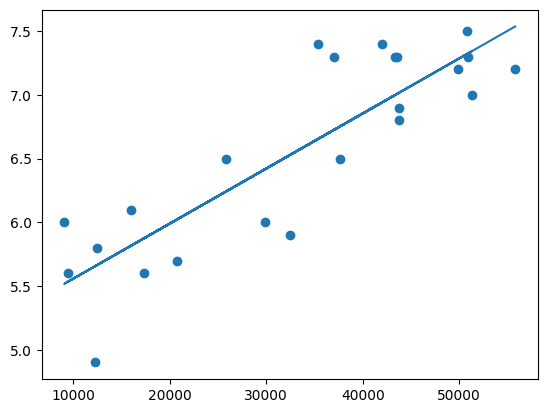

In [229]:
plt.scatter (X_train, y_train)
plt.plot (X_train, y_pred)

In [230]:
print (model.predict ([[40000]]))

[[6.85418248]]


In [275]:
wwtwo = pd.read_csv ('weather_ww2.csv', low_memory = False)

In [276]:
wwtwo.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [277]:
req_cols = ['MinTemp', 'MaxTemp', 'MeanTemp']

In [278]:
dataframe = wwtwo[req_cols]

<Axes: >

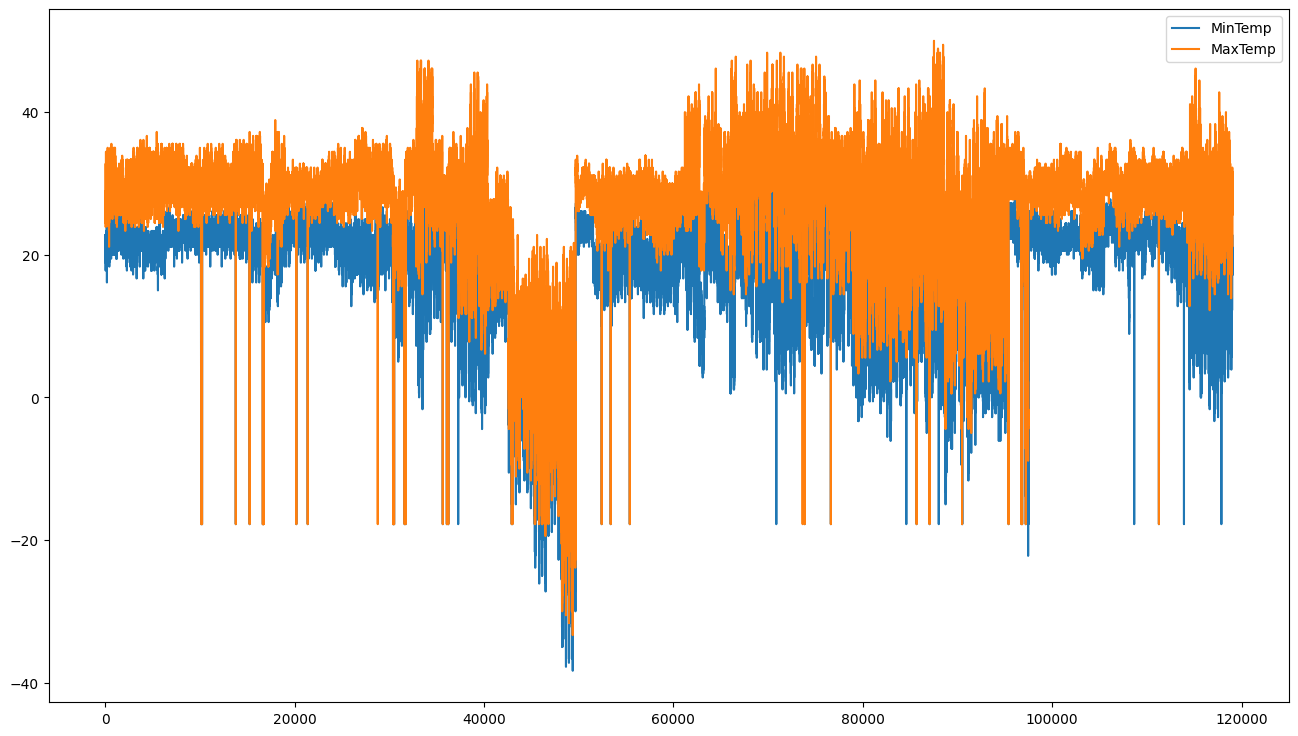

In [288]:
dataframe[['MinTemp', 'MaxTemp']].plot.line (figsize = (16, 9))

In [137]:
dataframe['MinTemp']

0         22.222222
1         21.666667
2         22.222222
3         22.222222
4         21.666667
            ...    
119035    18.333333
119036    18.333333
119037    18.333333
119038    18.333333
119039    17.222222
Name: MinTemp, Length: 119040, dtype: float64

In [116]:
model = LinearRegression ()

In [256]:
X = np.c_[dataframe['MinTemp']]
y = np.c_[dataframe['MaxTemp']]

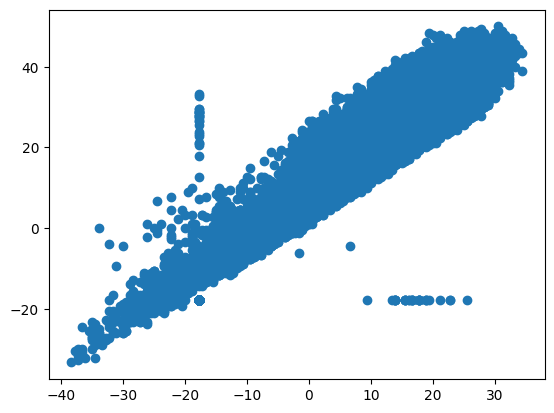

In [258]:
model.fit (X, y)

LinearRegression()

In [259]:
pred_vals = model.predict (X)

In [260]:
dataframe = np.hstack ((dataframe, pred_vals))

In [261]:
dataframe

array([[22.22222222, 25.55555556, 23.88888889, 31.11777216],
       [21.66666667, 28.88888889, 25.55555556, 30.60734204],
       [22.22222222, 26.11111111, 24.44444444, 31.11777216],
       ...,
       [18.33333333, 28.33333333, 23.33333333, 27.54476126],
       [18.33333333, 28.33333333, 23.33333333, 27.54476126],
       [17.22222222, 29.44444444, 23.33333333, 26.52390101]])

In [262]:
dataframe

array([[22.22222222, 25.55555556, 23.88888889, 31.11777216],
       [21.66666667, 28.88888889, 25.55555556, 30.60734204],
       [22.22222222, 26.11111111, 24.44444444, 31.11777216],
       ...,
       [18.33333333, 28.33333333, 23.33333333, 27.54476126],
       [18.33333333, 28.33333333, 23.33333333, 27.54476126],
       [17.22222222, 29.44444444, 23.33333333, 26.52390101]])

In [108]:
data = { 'x': [22, 26, 29, 30, 31, 31, 34, 35], 'y': [20, 20, 21, 29, 27, 24, 27, 31] }
df = pd.DataFrame (data)

In [109]:
X = np.c_[df['x']]
y = np.c_[df['y']]

In [110]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 0) 

In [111]:
model = LinearRegression ()

In [112]:
model.fit (X_train, y_train)

LinearRegression()

In [113]:
y_pred = model.predict (X_train)

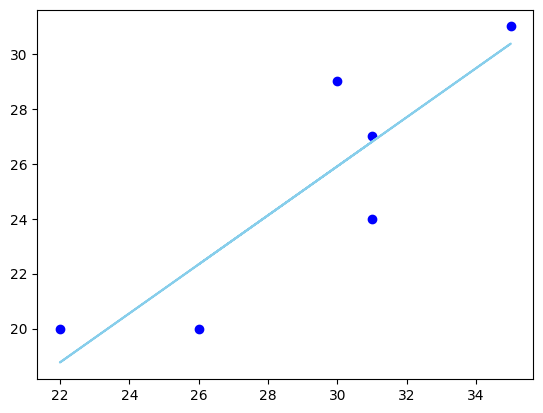

In [114]:
plt.scatter (X_train, y_train, color = 'blue') 
plt.plot (X_train, y_pred, color = 'skyblue') 
plt.show ()

In [115]:
model.predict ([[38]])

array([[33.05510535]])

In [231]:
montreal_b = pd.read_csv ('comptagesvelo2015.csv')

In [235]:
montreal_b.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         319 non-null    object 
 1   Unnamed: 1                   319 non-null    object 
 2   Berri1                       319 non-null    int64  
 3   Boyer                        319 non-null    int64  
 4   Brébeuf                      319 non-null    int64  
 5   CSC (Côte Sainte-Catherine)  319 non-null    int64  
 6   Maisonneuve_1                62 non-null     float64
 7   Maisonneuve_2                319 non-null    int64  
 8   Maisonneuve_3                319 non-null    int64  
 9   Notre-Dame                   319 non-null    int64  
 10  Parc                         319 non-null    int64  
 11  Parc U-Zelt Test             52 non-null     float64
 12  PierDup                      319 non-null    int64  
 13  Pont_Jacques_Cartier

In [238]:
montreal_b.head ()

Date Unnamed: 1  Berri1  Boyer  Brébeuf  CSC (Côte Sainte-Catherine)  \
0  01/01/2015      00:00      58     12        4                           17   
1  02/01/2015      00:00      75      7        5                           15   
2  03/01/2015      00:00      79      7        3                            7   
3  04/01/2015      00:00      10      1       21                            0   
4  05/01/2015      00:00      42      0        2                            0   

   Maisonneuve_1  Maisonneuve_2  Maisonneuve_3  Notre-Dame  ...  \
0           33.0             49             21          16  ...   
1           30.0            113             27           9  ...   
2           30.0            107             36          12  ...   
3           10.0             35             29           1  ...   
4           27.0             90             21           1  ...   

   Pont_Jacques_Cartier  Rachel / Hôtel de Ville  Rachel / Papineau  \
0                   NaN                       58                 91   
1                   NaN                      109                177   
2                   NaN                       71                131   
3                   NaN                        6                 11   
4                   NaN                        0                  5   

   René-Lévesque  Saint-Antoine  Saint-Laurent U-Zelt Test  Saint-Urbain  \
0             24              3                        NaN            17   
1             32             13                        NaN            11   
2             33              5                        NaN            14   
3              6              1                        NaN             1   
4             49             20                        NaN             0   

   Totem_Laurier  University  Viger  
0             78          21      6  
1             57          77      4  
2            174          40      5  
3             20           6      0  
4             41          56     10  

[5 rows x 23 columns]

In [3]:
mails = pd.read_csv ('spam_ham.csv')

In [8]:
mails.describe ()

label
count  3000.000000
mean      0.166667
std       0.372740
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

In [9]:
mails.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [10]:
mails.head (2)

email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1  martin a posted tassos papadopoulos the greek ...      0

In [17]:
spam_ratio = pd.value_counts (mails['label'])

<Axes: ylabel='label'>

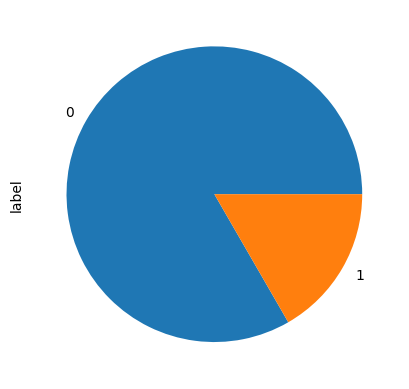

In [19]:
spam_ratio.plot (kind = 'pie')

In [21]:
model = KNeighborsClassifier (3)

In [24]:
X = mails['email']
y = mails['label']

In [26]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)

<Axes: >

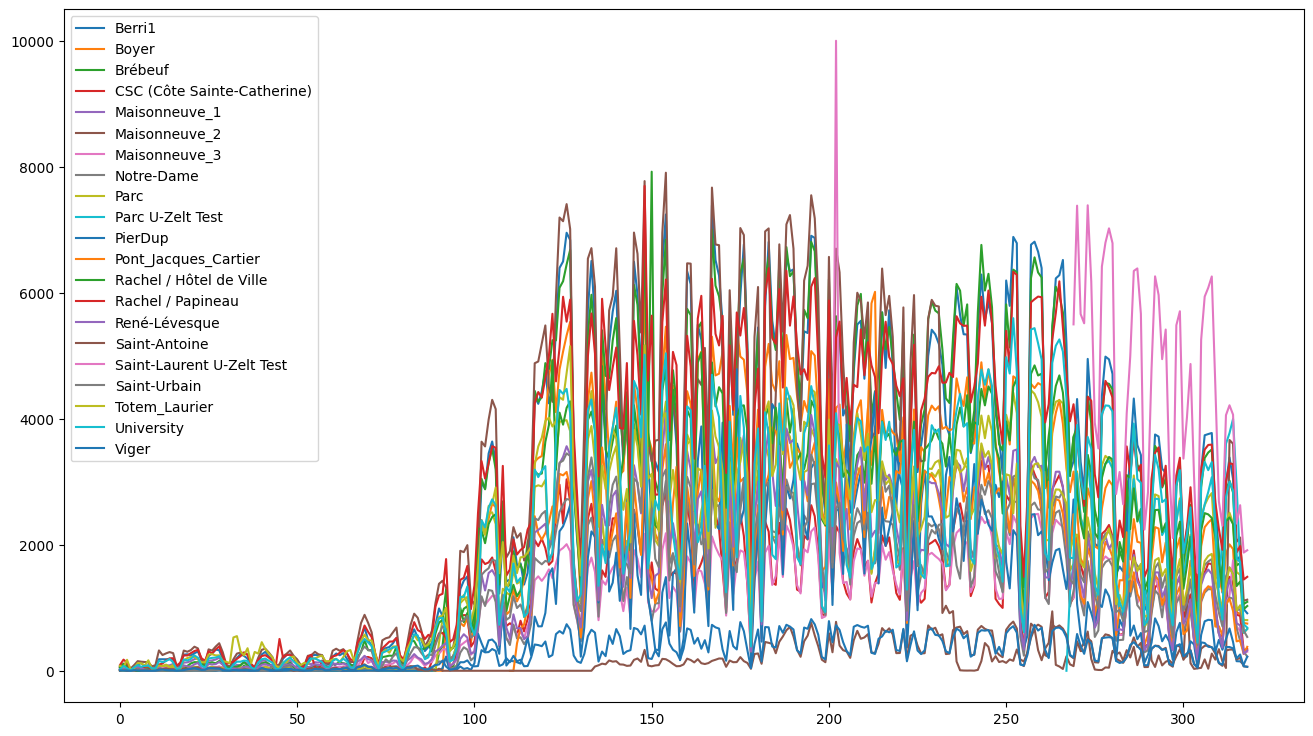

In [312]:
montreal_b.plot.line (figsize = (16, 9))

In [313]:
montreal_b.describe ()

Berri1        Boyer      Brébeuf  CSC (Côte Sainte-Catherine)  \
count   319.000000   319.000000   319.000000                   319.000000   
mean   2915.398119  2212.909091  2859.485893                  1167.388715   
std    2276.281648  1832.808709  2337.531344                   960.020397   
min      10.000000     0.000000     0.000000                     0.000000   
25%     387.500000     3.500000    33.000000                    54.500000   
50%    3044.000000  2180.000000  3011.000000                  1162.000000   
75%    4968.000000  3937.000000  5088.000000                  1948.000000   
max    7387.000000  6153.000000  7322.000000                  3334.000000   

       Maisonneuve_1  Maisonneuve_2  Maisonneuve_3   Notre-Dame         Parc  \
count      62.000000     319.000000     319.000000   319.000000   319.000000   
mean       89.935484    2208.031348    1011.175549  1137.316614  1754.257053   
std        51.886974    2452.475658     917.450049   991.065590  1415.004315   
min        10.000000       2.000000       8.000000     0.000000     0.000000   
25%        46.500000     214.500000     119.000000    25.500000    61.000000   
50%        85.000000     689.000000    1049.000000  1067.000000  1787.000000   
75%       131.500000    4114.500000    1675.000000  2094.500000  3025.500000   
max       207.000000    7905.000000    9999.000000  3035.000000  4867.000000   

       Parc U-Zelt Test  ...  Pont_Jacques_Cartier  Rachel / Hôtel de Ville  \
count         52.000000  ...            209.000000               319.000000   
mean        2090.250000  ...           2164.578947              2207.626959   
std          972.740577  ...           1049.224968              1660.936427   
min            0.000000  ...              0.000000                 0.000000   
25%         1275.000000  ...           1221.000000               324.500000   
50%         2258.000000  ...           2349.000000              2361.000000   
75%         2775.500000  ...           2966.000000              3658.000000   
max         3997.000000  ...           6014.000000              7921.000000   

       Rachel / Papineau  René-Lévesque  Saint-Antoine  \
count         319.000000     319.000000     319.000000   
mean         2939.294671    1477.206897     207.476489   
std          2105.774880    1254.990855     231.009131   
min             5.000000       0.000000       0.000000   
25%           513.000000     159.500000      15.500000   
50%          3169.000000    1422.000000     107.000000   
75%          4797.000000    2676.000000     337.000000   
max          7695.000000    4118.000000     781.000000   

       Saint-Laurent U-Zelt Test  Saint-Urbain  Totem_Laurier   University  \
count                  50.000000    319.000000     319.000000   319.000000   
mean                 4563.180000   1387.119122    1903.363636  2023.708464   
std                  1667.554469   1070.781272    1376.375755  1632.368428   
min                  1554.000000      0.000000      20.000000     6.000000   
25%                  3097.250000    244.500000     457.000000   352.500000   
50%                  4825.500000   1519.000000    1855.000000  1762.000000   
75%                  5957.750000   2237.000000    3111.000000  3539.000000   
max                  7388.000000   4342.000000    5166.000000  5596.000000   

            Viger  
count  319.000000  
mean   295.347962  
std    248.947624  
min      0.000000  
25%     47.000000  
50%    267.000000  
75%    526.000000  
max    820.000000  

[8 rows x 21 columns]

In [101]:
candy = pd.read_csv ('candy-data.csv')

In [12]:
candy.head (3)

competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   

   winpercent  
0   66.971725  
1   67.602936  
2   32.261086

In [102]:
X = candy.drop (columns = ['chocolate', 'competitorname'])
y = candy[['chocolate']]

In [103]:
candy

competitorname  chocolate  fruity  caramel  peanutyalmondy  \
0                    100 Grand          1       0        1               0   
1                 3 Musketeers          1       0        0               0   
2                     One dime          0       0        0               0   
3                  One quarter          0       0        0               0   
4                    Air Heads          0       1        0               0   
..                         ...        ...     ...      ...             ...   
80                   Twizzlers          0       1        0               0   
81                    Warheads          0       1        0               0   
82        WelchÕs Fruit Snacks          0       1        0               0   
83  WertherÕs Original Caramel          0       0        1               0   
84                    Whoppers          1       0        0               0   

    nougat  crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0        0                 1     0    1         0         0.732         0.860   
1        1                 0     0    1         0         0.604         0.511   
2        0                 0     0    0         0         0.011         0.116   
3        0                 0     0    0         0         0.011         0.511   
4        0                 0     0    0         0         0.906         0.511   
..     ...               ...   ...  ...       ...           ...           ...   
80       0                 0     0    0         0         0.220         0.116   
81       0                 0     1    0         0         0.093         0.116   
82       0                 0     0    0         1         0.313         0.313   
83       0                 0     1    0         0         0.186         0.267   
84       0                 1     0    0         1         0.872         0.848   

    winpercent  
0    66.971725  
1    67.602936  
2    32.261086  
3    46.116505  
4    52.341465  
..         ...  
80   45.466282  
81   39.011898  
82   44.375519  
83   41.904308  
84   49.524113  

[85 rows x 13 columns]

In [104]:
model = DecisionTreeClassifier ()
model.fit (X, y)

DecisionTreeClassifier()

In [105]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)
y_pred = model.predict (X_test)
accuracy_score (y_test, y_pred)

1.0

In [106]:
model.predict ([[0,0,0,1,0,0,1,0,0.604,0.511,67.602936]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [122]:
choco_ratio = pd.value_counts (candy['chocolate'])

<Axes: ylabel='chocolate'>

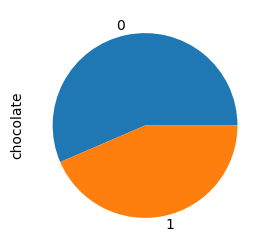

In [123]:
choco_ratio.plot (kind = 'pie', figsize = (4, 3))

In [58]:
covid = pd.read_csv ('covid_worldwide.csv')

In [98]:
covid.head ()

Serial Number  Country  Total Cases  Total Deaths  Total Recovered  \
0              1      USA    104196861     1132935.0      101322779.0   
1              2    India     44682784      530740.0       44150289.0   
2              3   France     39524311      164233.0       39264546.0   
3              4  Germany     37779833      165711.0       37398100.0   
4              5   Brazil     36824580      697074.0       35919372.0   

   Active Cases    Total Test    Population  
0     1741147.0  1.159833e+09  3.348053e+08  
1        1755.0  9.152658e+08  1.406632e+09  
2       95532.0  2.714902e+08  6.558452e+07  
3      216022.0  1.223324e+08  8.388360e+07  
4      208134.0  6.377617e+07  2.153536e+08

In [60]:
dataframe = pd.DataFrame (covid)

In [71]:
dataframe.dropna (inplace=True)
dataframe.isna ().sum ()
df = dataframe.copy ()
df.fillna (df.mean (), inplace=True)
df.isnull ().sum ()
df

/var/folders/8f/9lp__8v92vsfg8szvm_cz1tc0000gn/T/ipykernel_82520/4260569026.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna (df.mean (), inplace=True)


Serial Number                Country  Total Cases  Total Deaths  \
0                1                    USA    104196861     1132935.0   
1                2                  India     44682784      530740.0   
2                3                 France     39524311      164233.0   
3                4                Germany     37779833      165711.0   
4                5                 Brazil     36824580      697074.0   
..             ...                    ...          ...           ...   
217            218               Anguilla         3904          12.0   
218            219                  Macao         3488         120.0   
219            220  Saint Pierre Miquelon         3452           2.0   
220            221      Wallis and Futuna         3427           7.0   
224            225             Montserrat         1403           8.0   

     Total Recovered  Active Cases    Total Test    Population  
0        101322779.0     1741147.0  1.159833e+09  3.348053e+08  
1         44150289.0        1755.0  9.152658e+08  1.406632e+09  
2         39264546.0       95532.0  2.714902e+08  6.558452e+07  
3         37398100.0      216022.0  1.223324e+08  8.388360e+07  
4         35919372.0      208134.0  6.377617e+07  2.153536e+08  
..               ...           ...           ...           ...  
217           3879.0          13.0  5.138200e+04  1.523000e+04  
218           3357.0          11.0  7.850000e+03  6.674900e+05  
219           2449.0        1001.0  2.540000e+04  5.759000e+03  
220            438.0        2982.0  2.050800e+04  1.098200e+04  
224           1376.0          19.0  1.776200e+04  4.965000e+03  

[195 rows x 8 columns]

In [78]:
from sklearn.preprocessing import LabelEncoder
ltrans = LabelEncoder ()

In [94]:
df['Country'] = ltrans.fit_transform (df['Country'])
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split (X, y, train_size=0.8, random_state=1)

In [95]:
from sklearn.preprocessing import StandardScaler
stdscale = StandardScaler ()

In [96]:
X_train[:, 3:] = stdscale.fit_transform (X_train[:, 3:])
X_test[:, 3:] = stdscale.transform (X_test[:, 3:])

In [97]:
X_train

array([[ 5.60000000e+01,  9.40000000e+01,  1.40591700e+06, ...,
        -1.88883329e-01, -1.15040819e-01, -1.98549254e-01],
       [ 1.60000000e+01,  1.74000000e+02,  9.56961100e+06, ...,
         5.44583546e-01,  3.51738118e-01, -6.05795464e-02],
       [ 1.30000000e+02,  4.00000000e+00,  1.05184000e+05, ...,
        -3.10055991e-01, -1.25367064e-01, -2.73154206e-01],
       ...,
       [ 7.60000000e+01,  1.57000000e+02,  8.27962000e+05, ...,
        -2.42613835e-01, -1.22186378e-01,  4.93115359e-02],
       [ 1.54000000e+02,  1.39000000e+02,  4.67500000e+04, ...,
        -3.15664304e-01, -1.23044926e-01, -2.82414987e-01],
       [ 4.00000000e+01,  5.10000000e+01,  3.17324700e+06, ...,
        -2.02732980e-02, -1.23996992e-01,  6.72030993e-01]])

Text(0.5, 0.04, 'Categories')

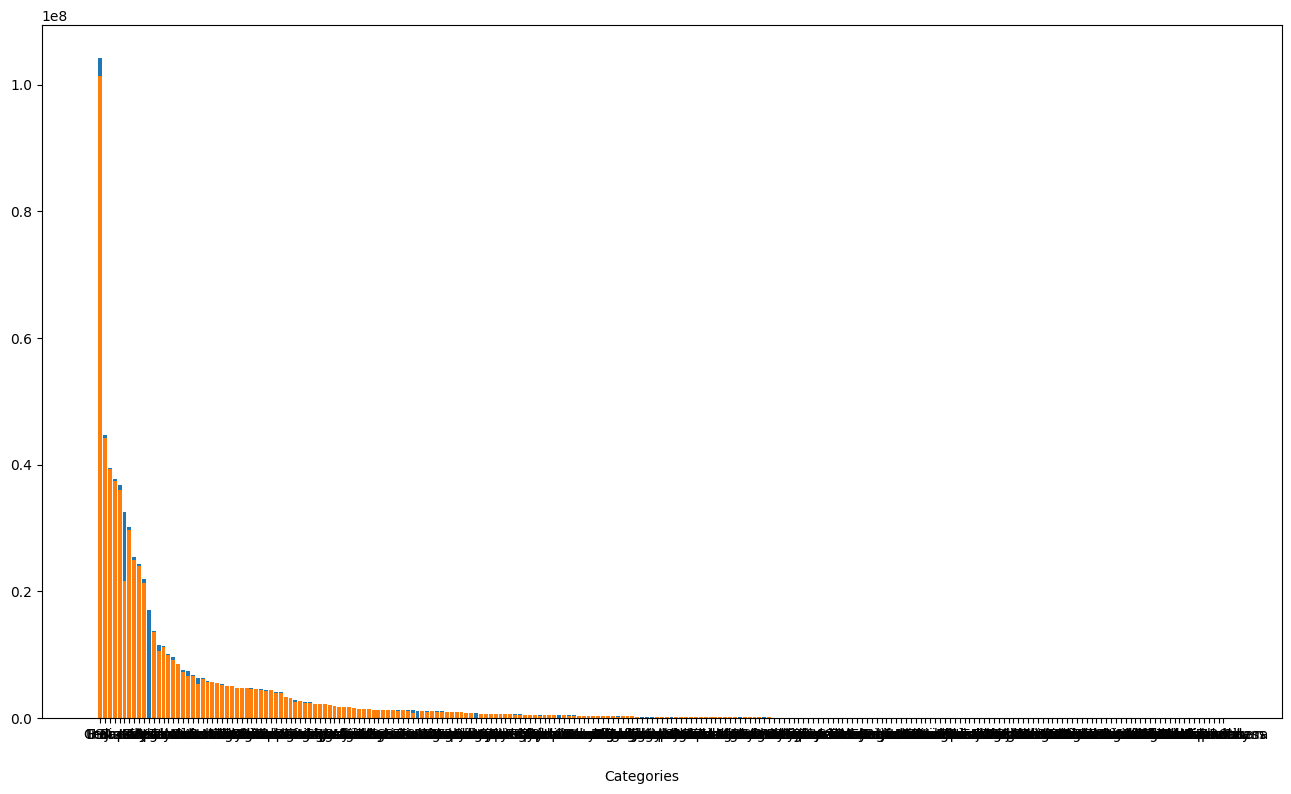

In [107]:
fig, ax = plt.subplots (1, 1, figsize = (16, 9))
x = covid['Country'].values
ax.bar (x, covid['Total Cases'].values)
ax.bar (x, covid['Total Recovered'].values)
plt.subplots_adjust (wspace=1)
fig.text (0.5, 0.04, 'Categories', ha='center')